In [1]:
from utility_bferror import *
from utility_bfcombiner import *
from utility_commonPlot import *

In [2]:
covar = np.load('../data/combine/covar.npy')
sigma = np.load('../data/combine/sigma.npy')
beta0 = np.array([0.10887305, 0.10776438, 0.10684416,
                  0.11192234, 0.1101022 , 0.10542362,
                  0.10490536, 0.10764396, 0.10769418,
                  0.11032918, 0.10960175, 0.10708695])


# 1. Uncertainty of Combined BR

10.8358 +/- 0.2118
10.8765 +/- 0.2206
11.1910 +/- 0.7982


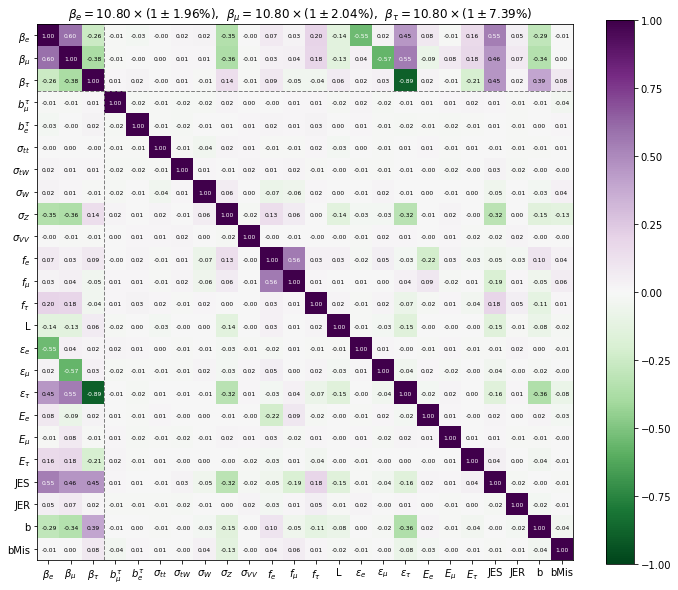

In [3]:
combiner = bfCombiner_theta( covar, sigma, beta0)
sig, cor = combiner.paramSigma()
for i in range(3):
    c,s = combiner.paramLS[i], sig[i]
    print('{:6.4f} +/- {:6.4f}'.format(c*100,s*100 ))
    
showParameterCovMat(cor,sig)
plt.savefig('../plots/combine/covarMatrix_betaTheta.png',dpi=300)

In [19]:
for i in range(sig.size):
    c,s = combiner.paramLS[i], sig[i]
    print('{:7.4f} +/- {:6.4f}'.format(c,s ))

 0.1084 +/- 0.0021
 0.1088 +/- 0.0022
 0.1119 +/- 0.0079
 0.0074 +/- 1.0059
-0.0088 +/- 1.0080
-0.1596 +/- 0.9918
 0.1668 +/- 0.9997
-0.8568 +/- 0.9737
 1.5175 +/- 0.8502
 0.0674 +/- 1.0003
 0.1491 +/- 0.6072
-1.5575 +/- 0.8435
-0.1935 +/- 0.9545
 0.3474 +/- 0.9636
 0.1259 +/- 0.9976
 0.0818 +/- 0.9921
 0.4593 +/- 0.8437
 0.8366 +/- 0.9497
-0.2019 +/- 1.0153
-0.0656 +/- 1.0047
-0.2684 +/- 0.7326
 0.0831 +/- 0.9889
-0.5258 +/- 0.6922
 1.1248 +/- 0.9655
